# Other tools & conclusions

> **Important notes for this notebook**
>
> # Important notes for this notebook
>
> ## Learning outcomes
>
> -   **Explore** LDAK software and some of its functionalities
> -   **Discuss** other tools and conclusions from this tutorial
>
> ## How to make this notebook work
>
> -   In this notebook, we will only use the `bash command line`. Be
>     sure to click on the menu `Kernel --> Change Kernel --> Bash`
>
> <img src="Images/bash.png" alt="Bash" width="80"> Choose the Bash
> kernel

## LDAK

Throughout this tutorial, we have used PLINK as the main method of our
GWAS analysis. This is, in large part, due to its popularity in modern
literature and its ease of use. But it is by no means the only method of
GWAS.

One tool that has been developed in recent years is
*[LDAK](https://dougspeed.com/)*, by Dough Speed (2012). One of the most
significant improvements of this program is the genetic prediction of
complex traits from both individual-level data and summary statistics.
Most prediction tools assume the
[GCTA](https://yanglab.westlake.edu.cn/software/gcta/#Overview) model,
whereby each SNP is expected to contribute equally to the phenotype (as
is the case with PLINK). If we replace the GCTA Model with the BLD-LDAK
Model, the squared correlation between observed and predicted phenotypes
($R^2$) increases by an average of 14% (s.d. 1%).

## Overview of functionality

Using LDAK is very similar to PLINK. As with PLINK, you will require the
`.bed`, `.bim`, and `.fam` files of your cohort. Beyond this, you will
need additional files:

-   `.info` - information scores for SNPs
-   `.pheno` - a phenotype
-   `.covar` - covariates
-   `.ind.hers` - estimates of per-SNP heritabilities
-   `.genefile` - (real) RefSeq human gene annotations

<img src="Images/bash.png" alt="Bash" width="40"> If we call our prefix
`human`, then very simply, we can compute summary statistics in the
following way:

In [1]:
# link the data and create output directory 
ln -sf ../Data
mkdir Results/GWAS8

# Run ldak software
../Software/ldak --calc-stats Results/GWAS8/human --bfile Data/ldak_data/human

mkdir: cannot create directory ‘Results/GWAS7’: File exists
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
LDAK - Software for obtaining Linkage Disequilibrium Adjusted Kinships and Loads More
Version 5.2 - Help pages at http://www.ldak.org
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

There are 2 pairs of arguments:
--calc-stats Results/GWAS7/human
--bfile Data/ldak_data/human

-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

Calculating predictor and individual statistics

To run the parallel version of LDAK, use "--max-threads" (this will only reduce runtime for some commands)

-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

Reading IDs for 424 samples from Data/ldak_data/human.fam

Reading details for 3289 predictors from Data/ldak_data/human.bim

Data contain 424 samples and 3289 predictors

Calculating statistics for Chun

This command asks LDAK to read the data stored in Binary PLINK format
with the prefix human, then save the results to files with the prefix
“human”. Remember that software command line arguments, can be provided
in any order (generally, there is no strict order requirement), so that
the command above would be equivalent to
`../Software/ldak --bfile Data/ldak_data/human --calc-stats Data/ldak_data/human`

The output files are called `human.stats` and `human.missing` and found
in the folder `Results/GWAS8`. By accessing the columns of
`human.stats`, we can create plots similar to those in the notebook
GWAS3 with the tutorial on QC:

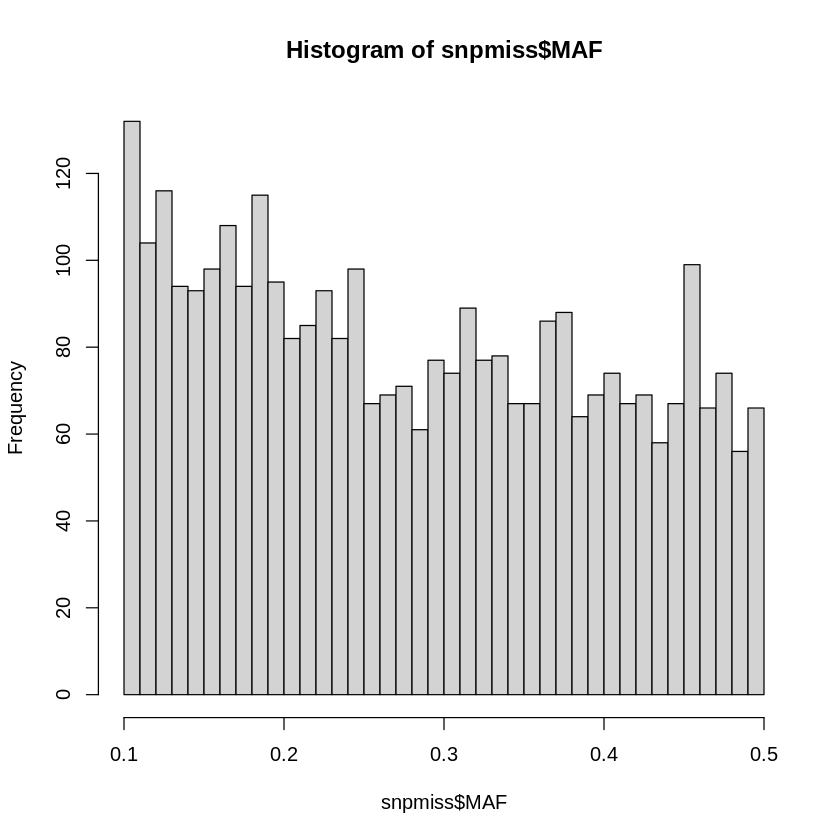

In [5]:
######### FOR EXERCISE

snpmiss <- read.table(file="Results/GWAS8/human.stats", header=TRUE)

head(snpmiss)

hist(snpmiss$MAF, breaks = 50) 

#  geom_histogram(binwidth = 0.001, col = "black", fill="tomato") + 
#  labs(title = "Frequency of missingness rates in individuals") + 
#  xlab("Frequency") + 
# ylab("Missingness in Individuals") + 
# theme_bw()


###########################

<figure>
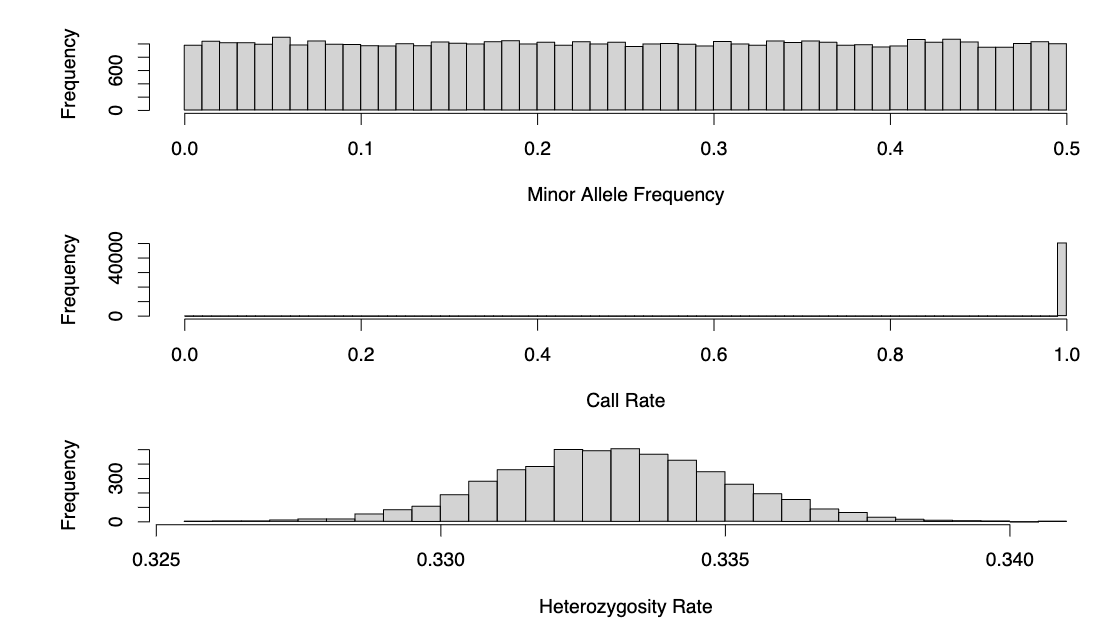
<figcaption aria-hidden="true">Figure 7.1: Genomic properties are easily
accessible by parsing through the outputted summary
statistics</figcaption>
</figure>

If you wish to perform single-SNP association analysis using linear
regression. We would use the main argument `--linear` in this case. Each
main argument requires different options. Remember to check the
Documentation at www.dougspeed.com. Most software have a `--help`
option, but LDAK doesn’t, so an alternative is to run the main argument,
which will print out the options required and missing for a successful
run:

In [1]:
../Software/ldak --linear linear

-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
LDAK - Software for obtaining Linkage Disequilibrium Adjusted Kinships and Loads More
Version 5.2 - Help pages at http://www.ldak.org
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

There is one pair of arguments:
--linear linear

Error, you must use "--pheno" to provide phenotypes


The output can be used to obtain GWAS plots of interest, such as a
Manhattan plot:

<figure>
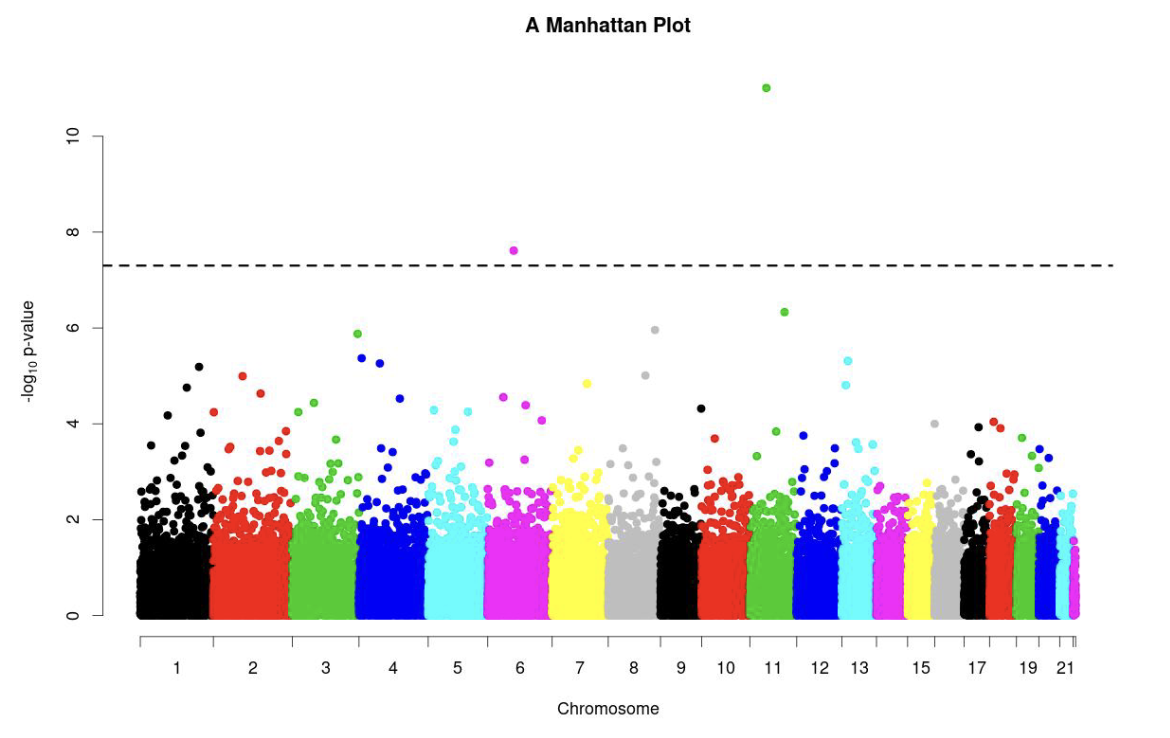
<figcaption aria-hidden="true">Figure 7.2: Manhattan plot outputted by
LDAK</figcaption>
</figure>

Furthermore, LDAK offers various additional methods and features, such
as the explicit incorporation of covariates and PRS. For those
interested, we recommend following the tutorials available
[here](https://dougspeed.com/short/). Additionally, we have included the
dataset accompanying this tutorial in the Data folder, conveniently
named `extra_data.zip`. All you need is to run the commands in the
tutorial.

The takeaway is that while more advanced tools exist, PLINK serves as an
excellent starting point for conducting focused and specific analyses,
particularly for educational purposes.

# Bibliography

| Materials | Description |
|-----------------------------------|-------------------------------------|
| **Other tools** |  |
| BOLT-LMM(Loh et al. 2015) | GWAS using mixed-models for large cohorts ([tutorial](https://alkesgroup.broadinstitute.org/BOLT-LMM/BOLT-LMM_manual.html)) |
| Regenie(Loh et al. 2015) | Different approach to perform GWAS scaling very well for quantitative & binary traits ([tutorial](https://rgcgithub.github.io/regenie/)) |
| **Other public courses** |  |
| [Statistics of GWAS](https://www.mv.helsinki.fi/home/mjxpirin/GWAS_course/) | Semester-long course run by the University of Helsinki - more leans towards the mathematical theory behind GWAS (e.g. no practical) |
| [Introduction to GWAS](https://pbreheny.github.io/adv-gwas-tutorial/index.html) | Similar to this course, but with more R implementation |
| **Post-GWAS** |  |
| [The Post-GWAS Era: From Association to Function](https://pubmed.ncbi.nlm.nih.gov/29727686/) | Good discussion that highlights key advances in the field of functional genomics that may facilitate the derivation of biological meaning post-GWAS |
| [Performing post-genome-wide association study analysis: overview, challenges and recommendations](https://pubmed.ncbi.nlm.nih.gov/35222990/) | More of a practical guide to the paper above |
| **Videos** |  |
| [Introduction to genomics theory](https://www.youtube.com/watch?v=7iarFfxYxQc) | 30-minute discussion of using PLINK in the context of GWAS |
| [MPG Primer: GWAS design and interpretation](https://www.youtube.com/watch?v=xw419NKqMqw) | Medical and Population Genomics Primer from MIT |
| [Illumina Sequencing](https://www.youtube.com/watch?v=fCd6B5HRaZ8) | Visually intuitive understanding of sequencing from Illumina |

Loh, Po-Ru, George Tucker, Brendan K Bulik-Sullivan, Bjarni J
Vilhjálmsson, Hilary K Finucane, Rany M Salem, Daniel I Chasman, et al.
2015. “Efficient Bayesian Mixed-Model Analysis Increases Association
Power in Large Cohorts.” *Nature Genetics* 47 (3): 284–90.

Speed, Doug, Gibran Hemani, Michael R Johnson, and David J Balding.
2012. “Improved Heritability Estimation from Genome-Wide SNPs.” *The
American Journal of Human Genetics* 91 (6): 1011–21.